In [12]:
#Import the dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#from scipy import stats
from windrose import WindroseAxes
import os

In [13]:
# Load dataset 
#df = pd.read_csv('data/benin raw.csv')
df=pd.read_csv('F:/solar-challenge-week1/data/benin_raw.csv')

In [14]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
# 1. Summary Statistics & Missing-Value Report
print("The description of the numeric columns:")
print(df.describe())
#Overview of categorical columns
#print("***************************")
#print("The description of the categorical columns: ")
#print(df.describe(include=['object']))
#Overview of all columns
print("****************************")
print("The description of all columns:")
print (df.describe(include='all'))
#Overview of the dataset
print("****************************")
print("An overview of the dataset: the first 5 rows") 
print(df.head())
#Overview of the dataset
print("****************************")
print("An overview of the dataset: the last 5 rows")

# Overview of numeric columns
print("The description of the numeric columns:") 
print (df.describe())
#Overview of categorical columns
print("****************************")
print("The description of the categorical columns:") 
#print(df.describe(include=['object']))
#Overview of all columns
print("****************************")
print("The description of all columns:")
print (df.describe(include='all'))
#Overview of the dataset
print("****************************")
print("An overview of the dataset: the first 5 rows") 
print(df.head())
#Overview of the dataset
print("****************************")
print("An overview of the dataset: the last 5 rows")
print(df.tail())
#Overview of the dataset
print("****************************")
print("An overview of the dataset: a random sample of 5 rows")
print(df.sample())
#Overview of the dataset
print("****************************")
print("An overview of the dataset: the shape of the dataset")
print(df.info())
#Check for missing values
print("****************************")
print("Check for missing values: ")
print(df.isna().sum())


The description of the numeric columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000   

In [16]:
# 2. Outlier Detection & Basic Cleaning
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
print("\n=== Outlier Detection (Z-scores > 3) ===")
for col in key_columns:
    df[f'{col}_zscore'] = np.abs(stats.zscore(df[col], nan_policy='omit'))
outliers = df[df[[f'{col}_zscore' for col in key_columns]].gt(3).any(axis=1)]
print(f"Number of rows with outliers (|Z|>3): {len(outliers)}")


=== Outlier Detection (Z-scores > 3) ===
Number of rows with outliers (|Z|>3): 7740


In [17]:
## Impute missing values in key columns with median
for col in key_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing Timestamp or other critical non-numeric columns if any
df.dropna(subset=['Timestamp'], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_99760\1805406148.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_99760\1805406148.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [18]:
# Export cleaned DataFrame
if not os.path.exists('output'):
    os.makedirs('output')
df.drop(columns=[f'{col}_zscore' for col in key_columns]).to_csv('output/benin_clean.csv', index=False)
print("\nCleaned data exported to output/benin_clean.csv")



Cleaned data exported to output/benin_clean.csv


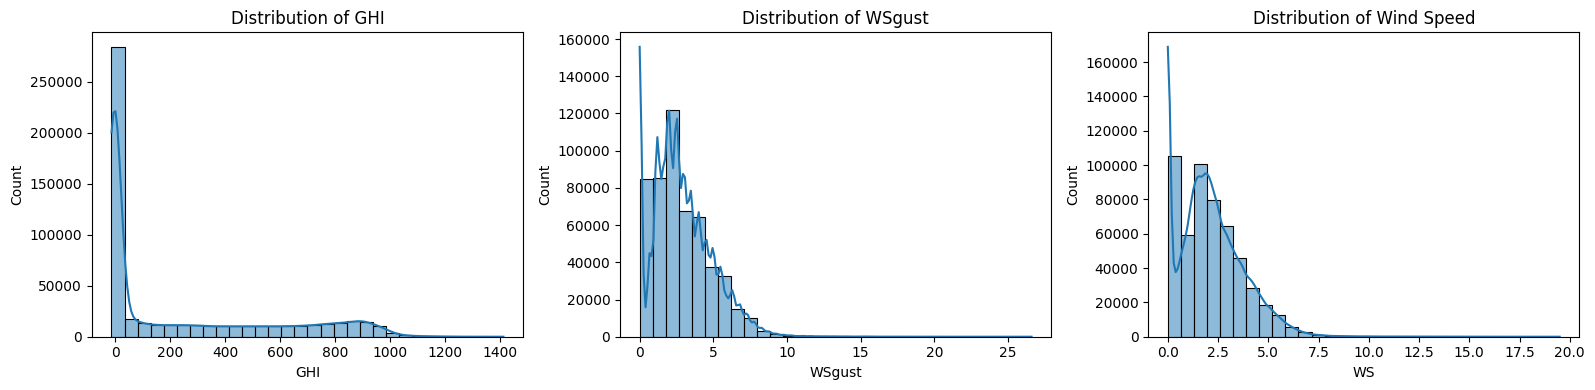

In [20]:
 # Histograms
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['GHI'], bins=30, kde=True)
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.subplot(1, 3, 2)
sns.histplot(df['WSgust'], bins=30, kde=True)
plt.title('Distribution of WSgust')
plt.xlabel('WSgust')
plt.subplot(1, 3, 3)
sns.histplot(df['WS'], bins=30, kde=True)
plt.title('Distribution of Wind Speed')
plt.xlabel('WS')
plt.tight_layout()
plt.savefig('figures/benin/histograms.png')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_99760\3704064405.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_99760\3704064405.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('figures/benin/time_series.png')
f:\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


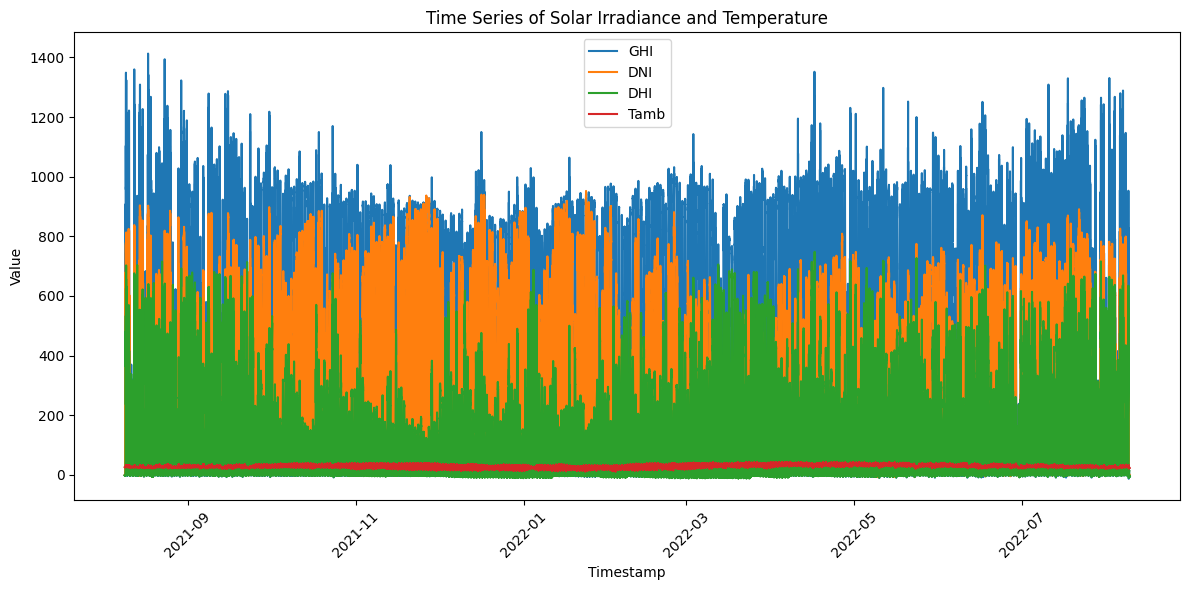

In [21]:
# 3. Time Series Analysis
plt.figure(figsize=(12, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.title('Time Series of Solar Irradiance and Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/benin/time_series.png')
plt.show()

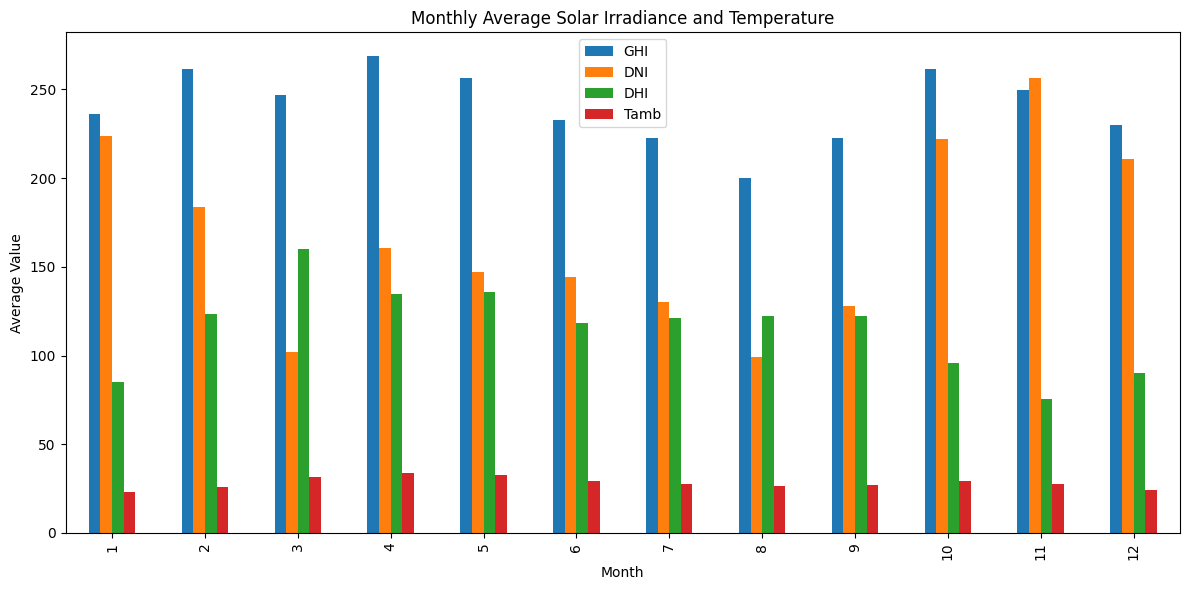

In [22]:
# Monthly trends
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average Solar Irradiance and Temperature')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.tight_layout()
plt.savefig('figures/benin/monthly_trends.png')
plt.show()

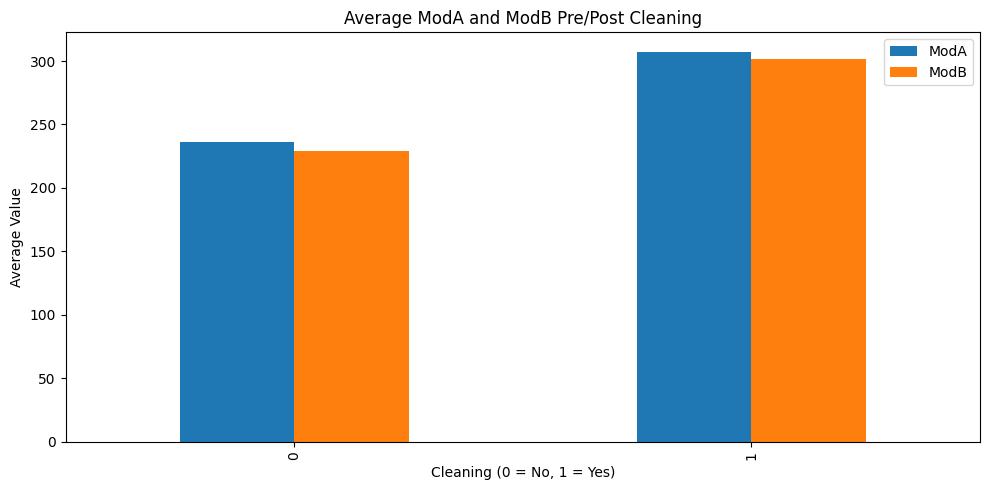

In [23]:
# 4. Cleaning Impact
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_impact.plot(kind='bar', figsize=(10, 5))
plt.title('Average ModA and ModB Pre/Post Cleaning')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value')
plt.tight_layout()
plt.savefig('figures/benin/cleaning_impact.png')
plt.show()

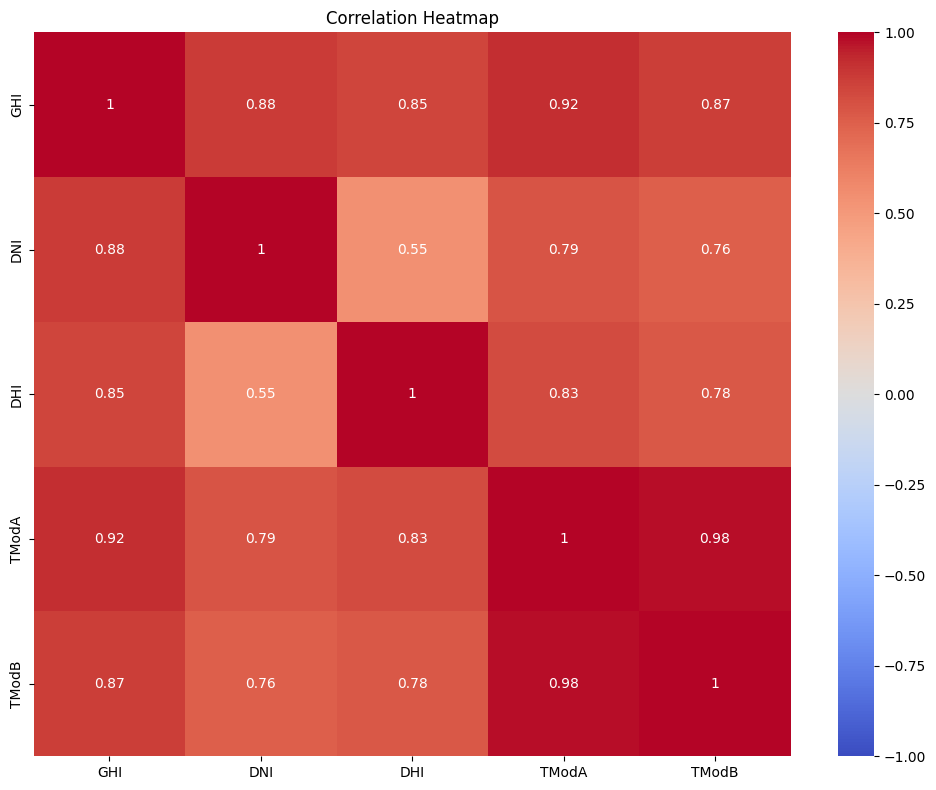

In [24]:
# 5. Correlation & Relationship Analysis
plt.figure(figsize=(10, 8))
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('figures/benin/correlation_heatmap.png')
plt.show()

In [ ]:
# Scatter plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.1)
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.subplot(1, 3, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.1)
plt.xlabel('Wind Gust (WSgust)')
plt.ylabel('GHI')
plt.subplot(1, 3, 3)
plt.scatter(df['WD'], df['GHI'], alpha=0.1)
plt.xlabel('Wind Direction (WD)')
plt.ylabel('GHI')
plt.tight_layout()
plt.savefig('figures/benin/wind_vs_ghi.png')
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI')
plt.tight_layout()
plt.savefig('figures/benin/rh_vs_tamb_ghi.png')
plt.show()

In [ ]:
# 6. Wind & Distribution Analysis
# Wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose Plot (Wind Speed and Direction)')
plt.savefig('figures/benin/wind_rose.png')
plt.show()

In [ ]:
## Temperature Analysis
print("\n=== Temperature and RH Analysis ===")
print("Correlation between RH and Tamb:", df['RH'].corr(df['Tamb']))
print("Correlation between RH and GHI:", df['RH'].corr(df['GHI']))

In [ ]:
# 8. Bubble Chart
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*3, alpha=0.5)
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs. Tamb (Bubble Size = RH)')
plt.tight_layout()
plt.savefig('figures/benin/bubble_chart.png')
plt.show()